# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Muhammad Ivan Dimitra
- Email:ivandimitra@gmail.com
- Id Dicoding:a010ybm329

## Persiapan

### Menyiapkan library yang dibutuhkan

In [9]:
# Manipulasi dan Analisis Data
import pandas as pd
import numpy as np
from scipy.stats import pointbiserialr

# Visualisasi Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pra-pemrosesan & Evaluasi
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Modeling (ML Algorithms)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Utilities
import warnings
warnings.filterwarnings('ignore')
import joblib

### Menyiapkan data yang akan diguankan

In [10]:

file_path = 'data.csv'

# Load dataset
df = pd.read_csv(file_path, low_memory=False)  # low_memory=False supaya tidak warning data types


# Tampilkan satu baris teratas secara lengkap tanpa terpotong
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
display(df.head(3))

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.0,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.0,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.0,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout


## Data Understanding

In [11]:
df.shape

(4424, 37)

In [12]:
print(df.columns.tolist())

['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [14]:
df.describe()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [15]:
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [16]:
df.duplicated().sum()

0

In [17]:
df.select_dtypes(include='object').nunique()

Status    3
dtype: int64

In [18]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nDistribusi nilai pada kolom '{col}':")
    print(df[col].value_counts())


Distribusi nilai pada kolom 'Status':
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


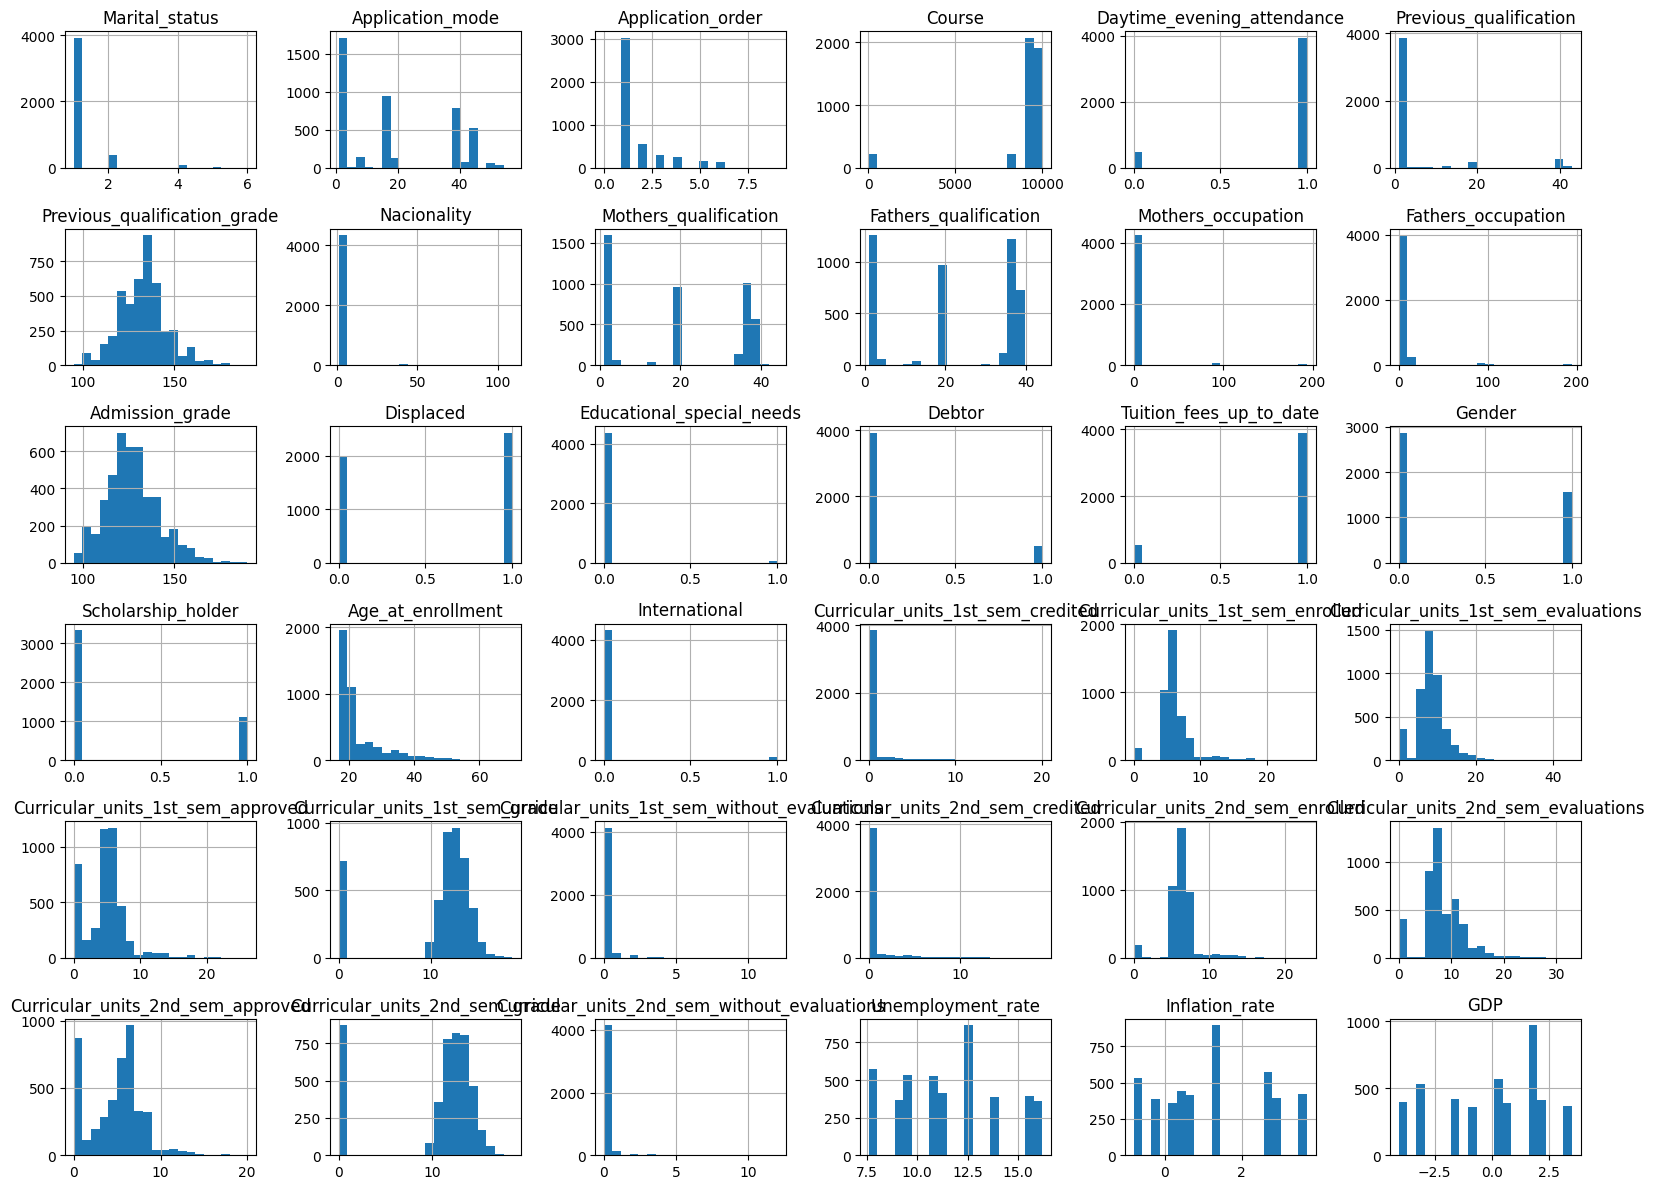

In [19]:
# Kolom numerik saja
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot histogram untuk beberapa kolom numerik
df[numerical_cols].hist(bins=20, figsize=(16, 12))
plt.tight_layout()
plt.show()

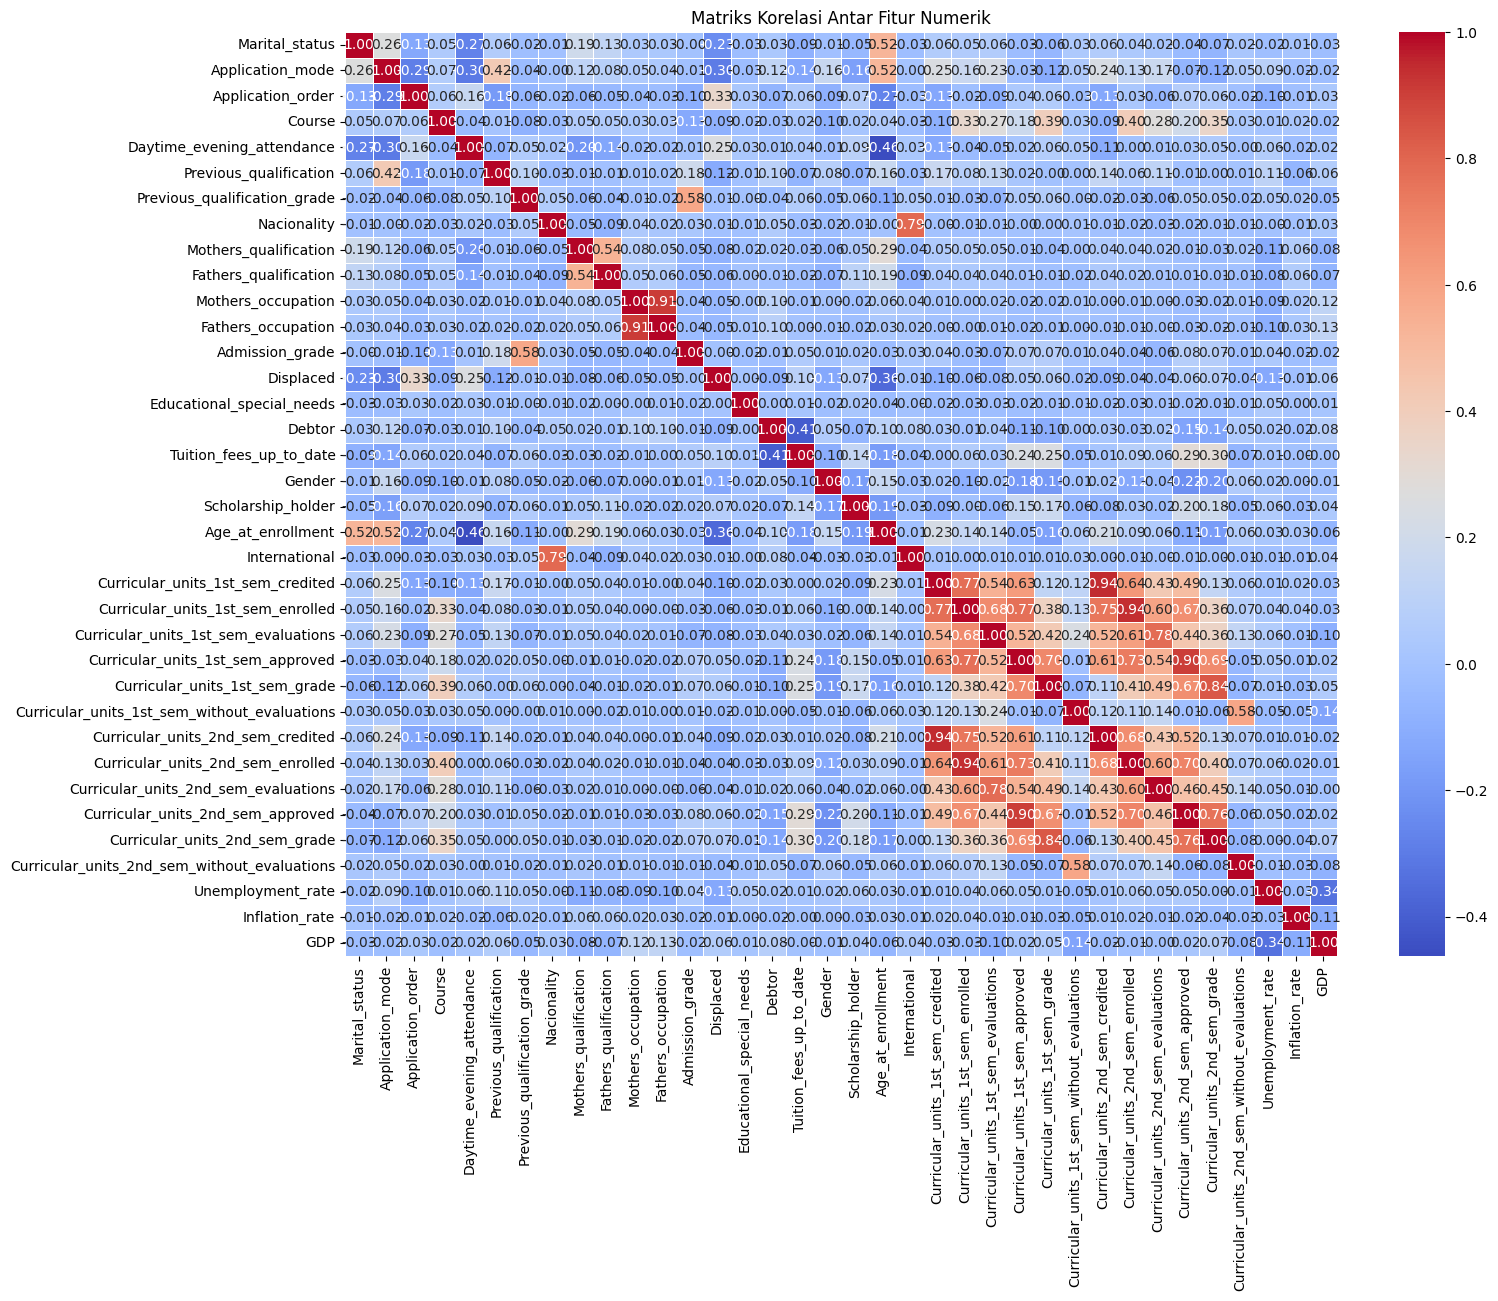

In [20]:
# Korelasi antar fitur numerik
plt.figure(figsize=(16, 12))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Matriks Korelasi Antar Fitur Numerik")
plt.show()

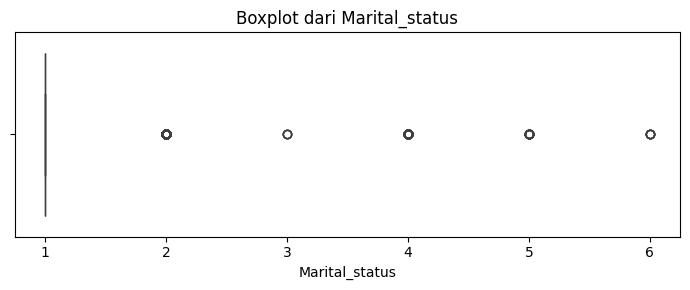

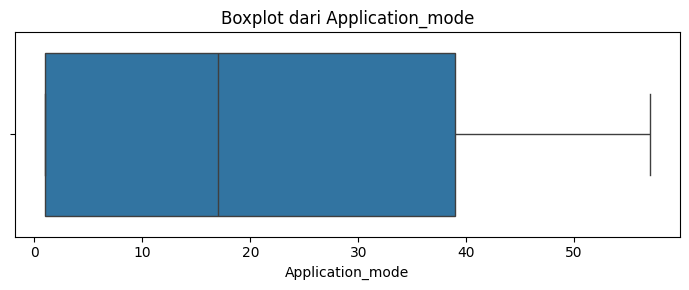

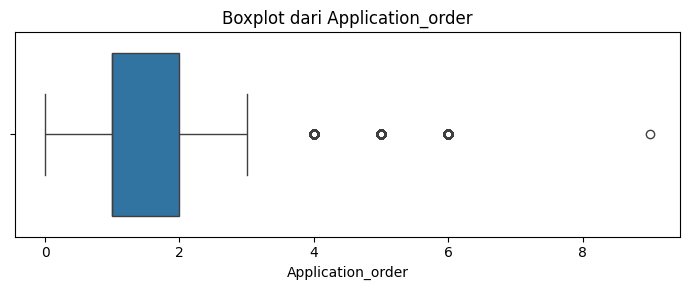

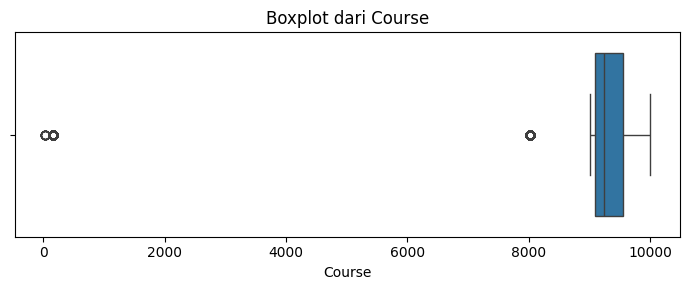

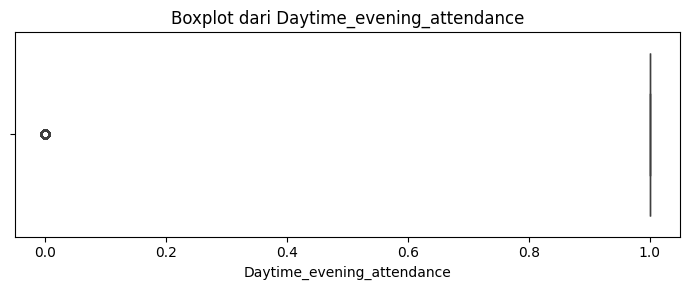

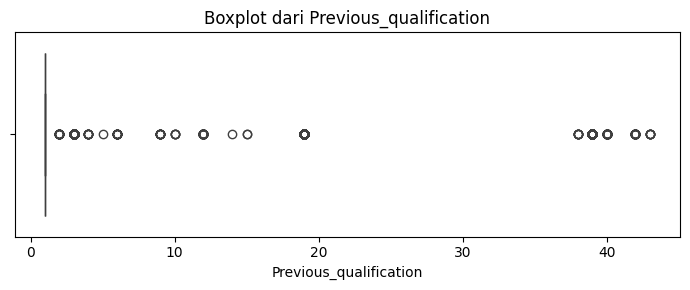

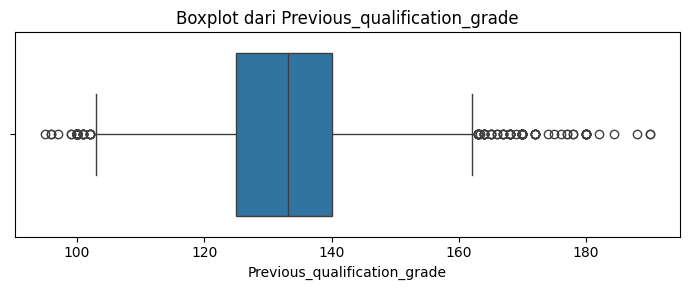

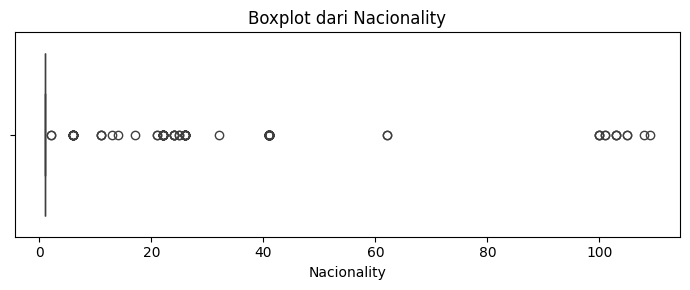

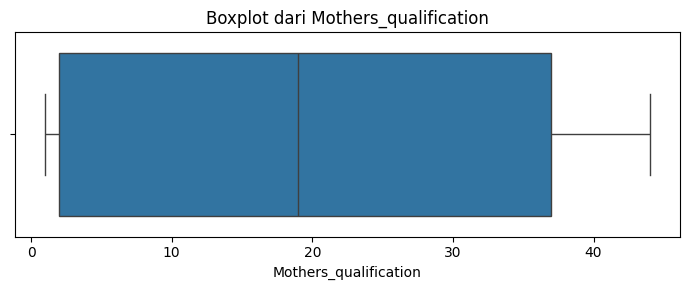

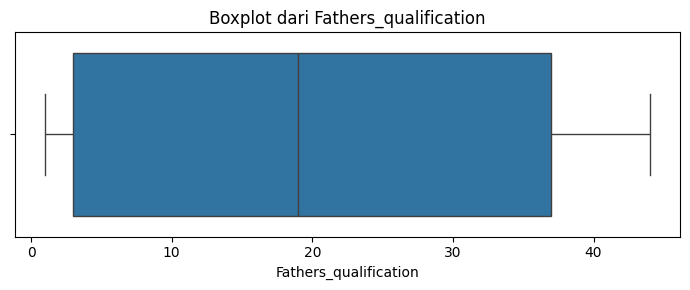

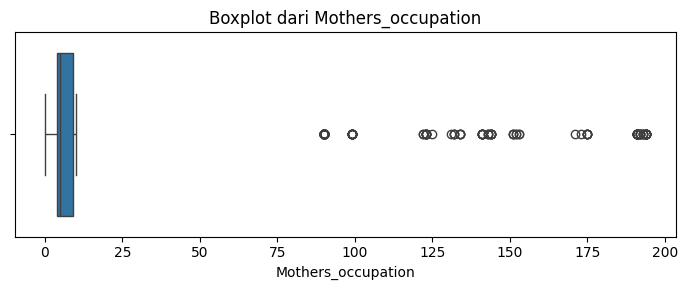

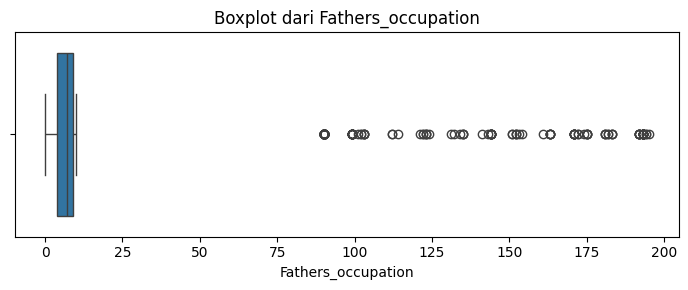

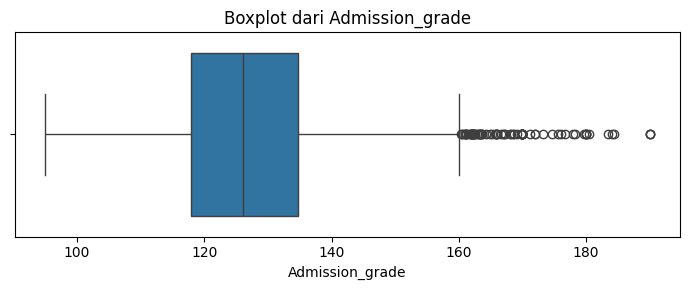

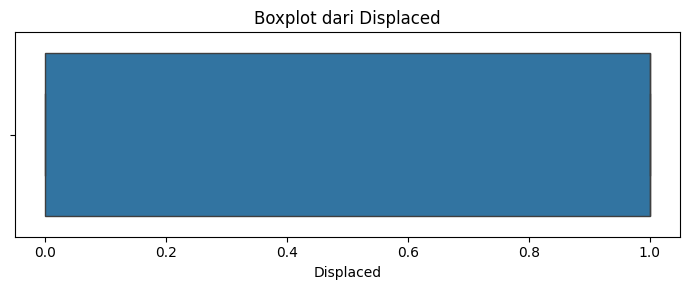

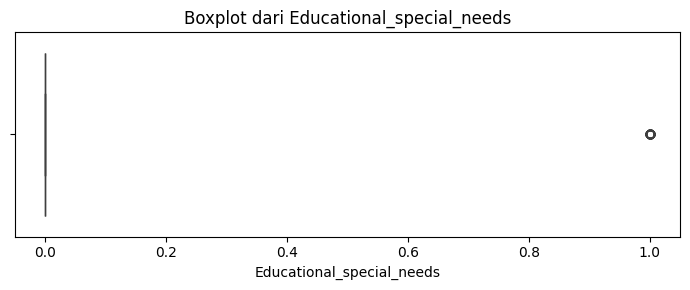

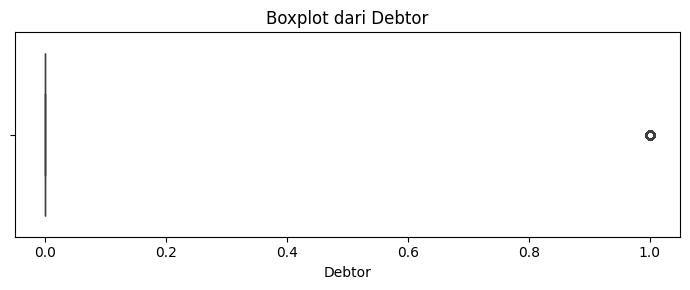

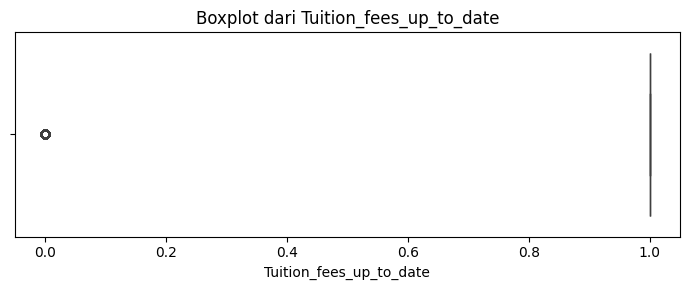

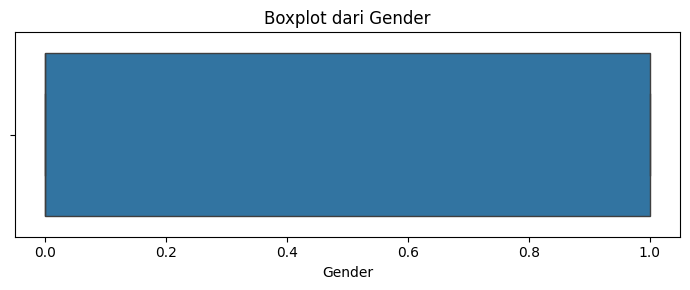

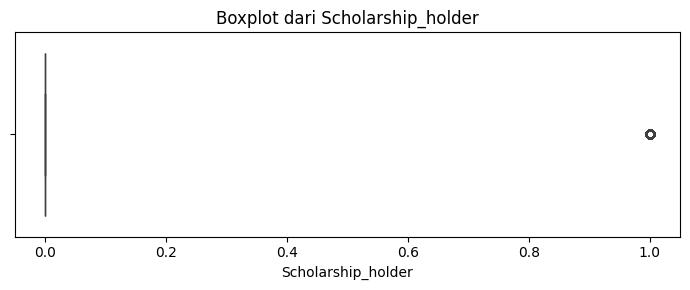

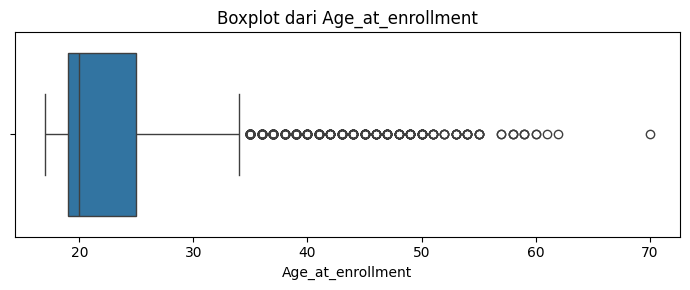

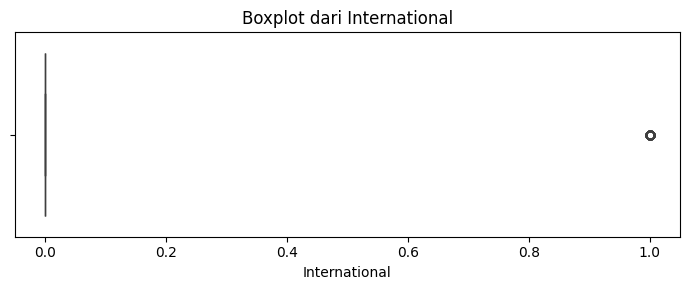

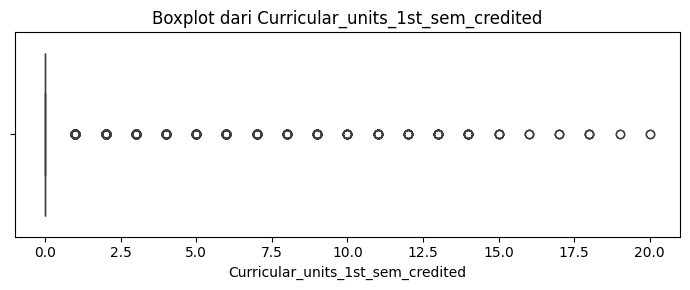

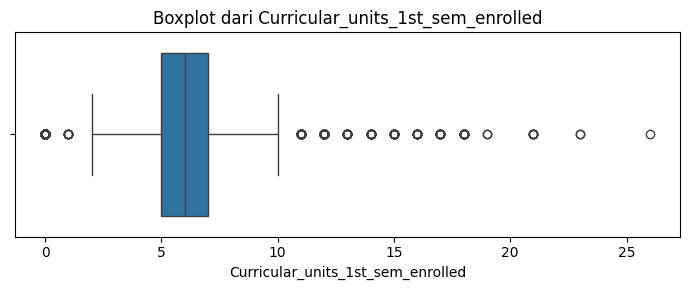

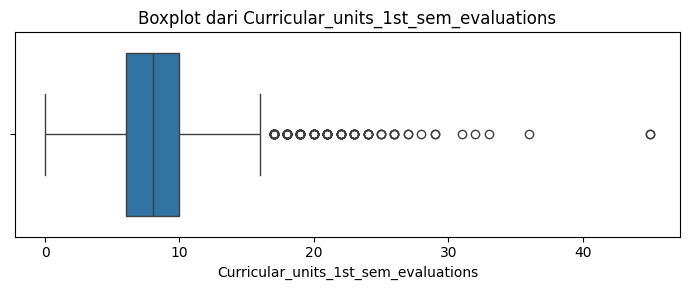

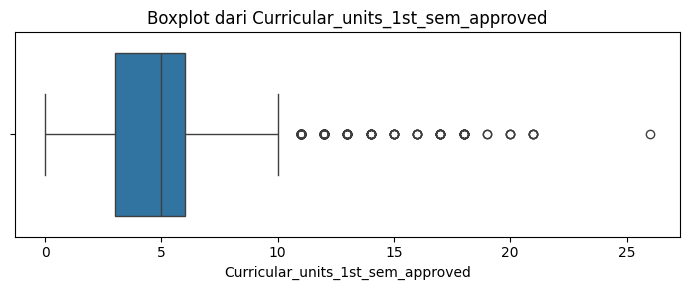

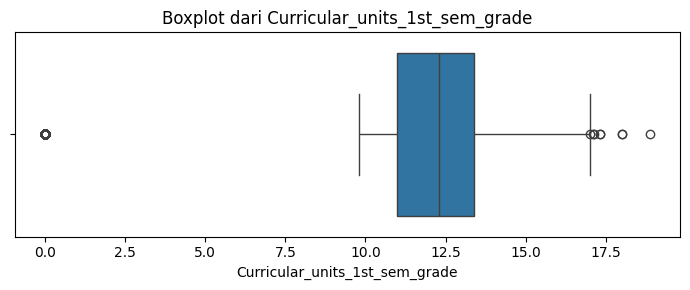

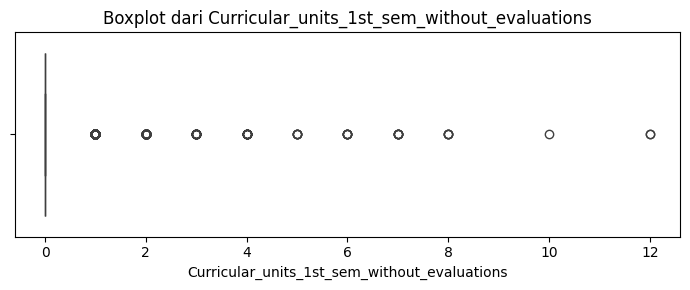

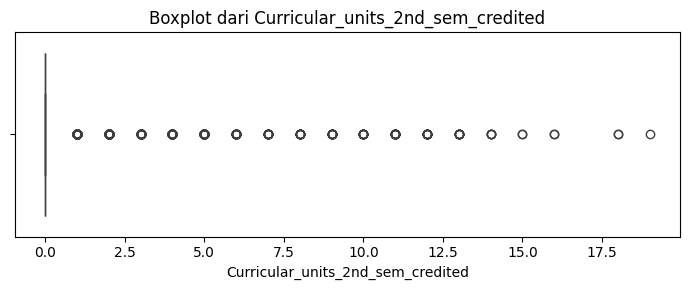

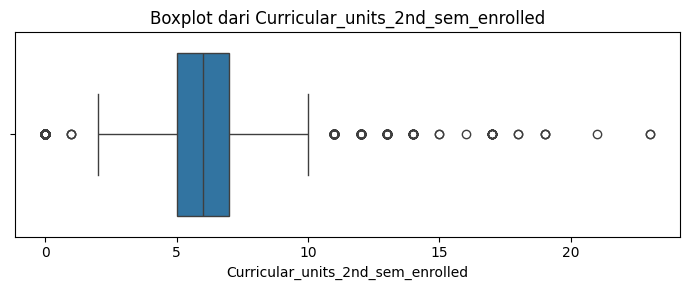

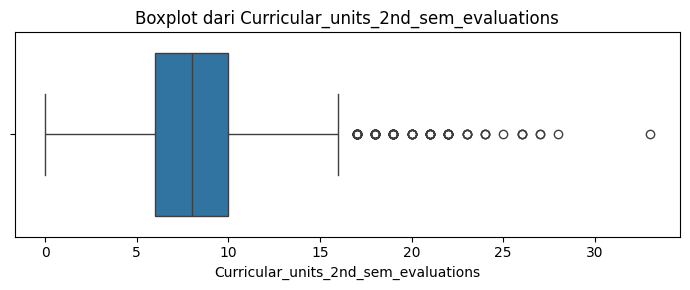

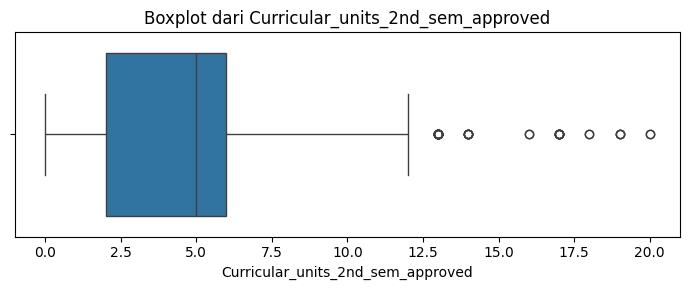

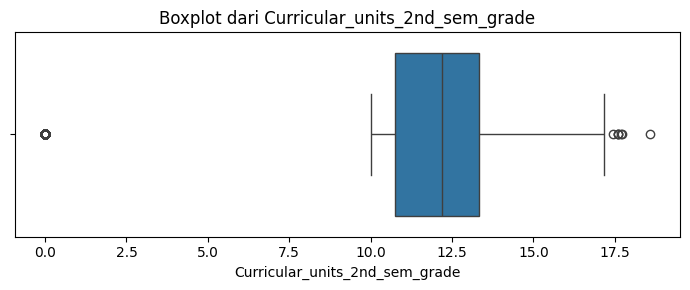

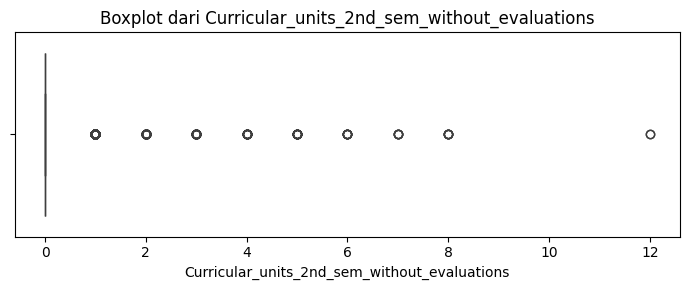

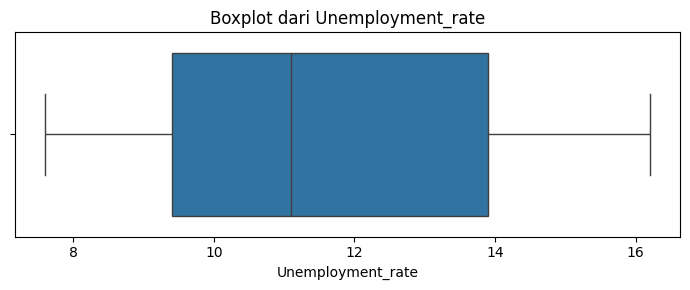

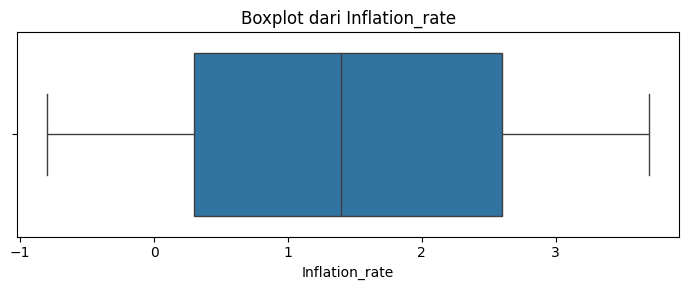

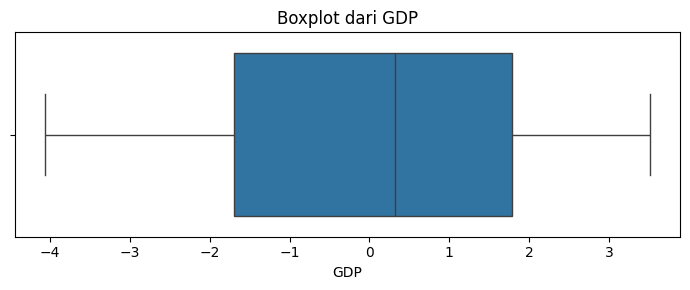

In [21]:
# Ambil semua kolom numerik
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Visualisasi boxplot semua kolom numerik
for col in numerical_cols:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot dari {col}')
    plt.tight_layout()
    plt.show()

## Data Preparation / Preprocessing

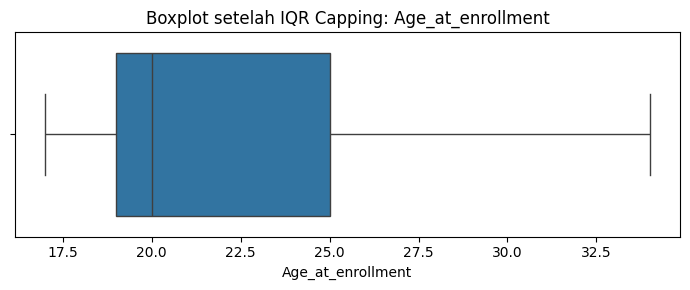

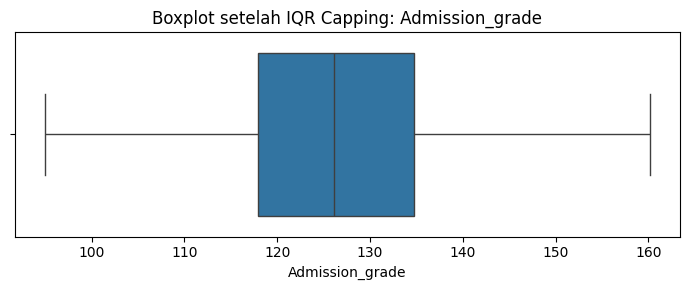

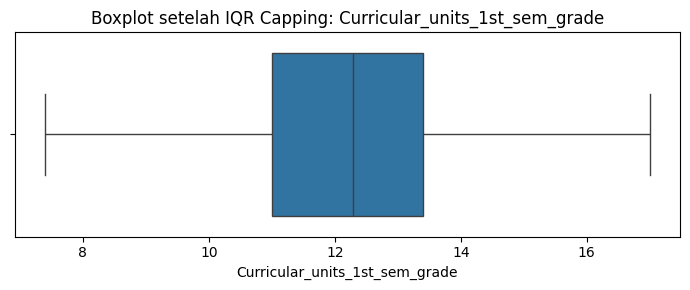

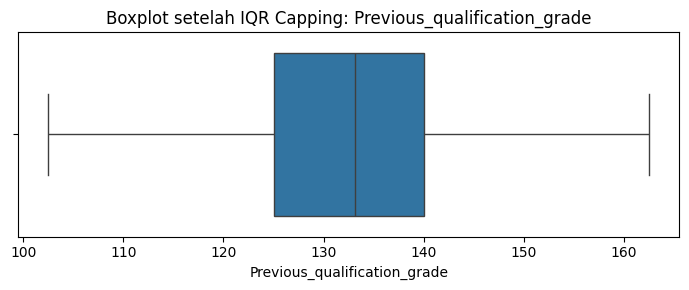

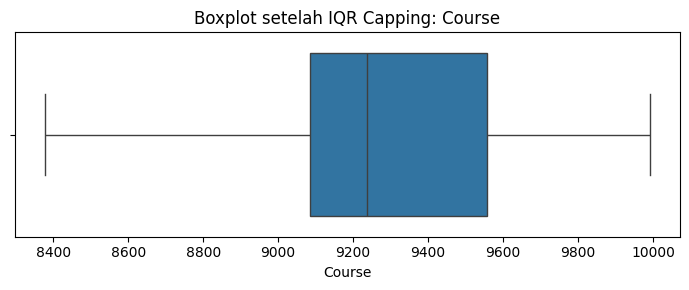

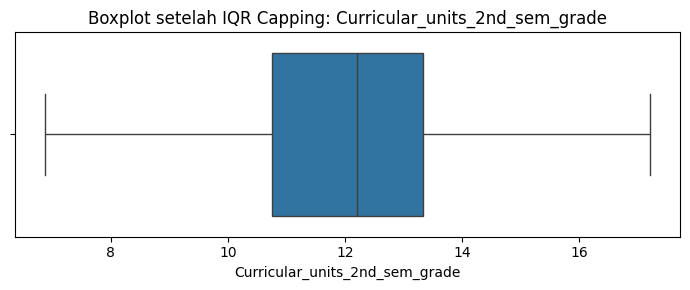

In [22]:
# Fungsi IQR capping
def iqr_capping(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

# Terapkan capping pada semua fitur
capping_fitur = ['Age_at_enrollment', 'Admission_grade','Curricular_units_1st_sem_grade', 'Previous_qualification_grade', 'Course', 'Curricular_units_2nd_sem_grade']
for col in capping_fitur:
    df[col] = iqr_capping(df[col])

# Visualisasi boxplot untuk setiap kolom numerik setelah capping
for col in capping_fitur:
    plt.figure(figsize=(7, 3))
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot setelah IQR Capping: {col}')
    plt.tight_layout()
    plt.show()

In [24]:
# Standarisasi fitur pada capping_fitur menggunakan StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[capping_fitur] = scaler.fit_transform(df[capping_fitur])

# Tampilkan hasil scaling untuk memastikan
df_scaled[capping_fitur].head()

,Age_at_enrollment,Admission_grade,Curricular_units_1st_sem_grade,Previous_qualification_grade,Course,Curricular_units_2nd_sem_grade
0,-0.454236,0.035097,-1.923650,-0.834072,-2.191159,-1.786401
1,-0.639106,1.121187,0.935356,2.183947,-0.099999,0.791523
2,-0.639106,-0.143537,-1.923650,-0.834072,-0.539489,-1.786401
3,-0.454236,-0.515094,0.687823,-0.834072,1.139649,0.310732
4,2.133947,1.049734,0.213385,-2.382792,-2.191159,0.538475


## Modeling

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

# Identifikasi kolom yang ada di df_scaled (kecuali Status)
scaled_features = [col for col in df_scaled.columns if col != 'Status']

# Hapus kolom yang sama dari df original (yang sudah ada versi scaled-nya)
# Juga hapus kolom Status dari df original karena akan ambil dari df_scaled
columns_to_drop = scaled_features + ['Status']
df_original_filtered = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# Gabungkan df yang sudah difilter dengan df_scaled
# Pastikan index sama untuk penggabungan yang benar
df_combined = pd.concat([df_original_filtered, df_scaled], axis=1)

# Pastikan tidak ada duplikat kolom
if df_combined.columns.duplicated().any():
    print("Warning: Ada kolom duplikat, menghapus duplikat...")
    df_combined = df_combined.loc[:, ~df_combined.columns.duplicated()]

print("Kolom di df_combined:")
print(df_combined.columns.tolist())
print(f"\nShape df_combined: {df_combined.shape}")

# Siapkan fitur dan target dari dataset gabungan
X = df_combined.drop(columns=['Status'])
y = df_combined['Status']

# Debug: Cek apakah y adalah Series
print(f"Tipe y: {type(y)}")
if hasattr(y, 'shape'):
    print(f"Shape y: {y.shape}")

# Pastikan y adalah Series (1-dimensional)
if isinstance(y, pd.DataFrame):
    y = y.iloc[:, 0]  # Ambil kolom pertama jika masih DataFrame

print(f"\nJumlah fitur: {X.shape[1]}")
print(f"Distribusi target:\n{y.value_counts()}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nUkuran training set: {X_train.shape}")
print(f"Ukuran test set: {X_test.shape}")

# Training Decision Tree
print("\n=== Training Decision Tree ===")
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Training Random Forest
print("=== Training Random Forest ===")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluasi model
from sklearn.metrics import accuracy_score, classification_report

# Prediksi
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)

# Akurasi
dt_accuracy = accuracy_score(y_test, dt_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"\n=== HASIL EVALUASI ===")
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

print(f"\n=== Decision Tree Classification Report ===")
print(classification_report(y_test, dt_pred))

print(f"\n=== Random Forest Classification Report ===")
print(classification_report(y_test, rf_pred))

Kolom di df_combined:
['Marital_status', 'Application_mode', 'Application_order', 'Course', 'Daytime_evening_attendance', 'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 'Fathers_qualification', 'Mothers_occupation', 'Fathers_occupation', 'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor', 'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment', 'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled', 'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations', 'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_enrolled', 'Curricular_units_2nd_sem_evaluations', 'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade', 'Curricular_units_2nd_sem_without_evaluations', 'Unemployment_rate', 'Inflation_rate', 'GDP', 'Status']

Shape df_combined: (

## Evaluation

=== CEK LABEL MAPPING ===
Label asli dari df_combined: ['Dropout' 'Graduate' 'Enrolled']
Mapping label:
  Dropout -> Dropout
  Enrolled -> Enrolled
  Graduate -> Graduate

=== EVALUASI MODEL ===

1. DISTRIBUSI KELAS:
Distribusi y_test:
Status
Dropout     284
Enrolled    159
Graduate    442
Name: count, dtype: int64

Dengan label asli:
  Dropout: 284 (32.1%)
  Enrolled: 159 (18.0%)
  Graduate: 442 (49.9%)

DECISION TREE
Accuracy: 0.6689
Precision: 0.6764
Recall: 0.6689
F1-Score: 0.6724

Classification Report:
              precision    recall  f1-score   support

     Dropout       0.66      0.68      0.67       284
    Enrolled       0.35      0.38      0.36       159
    Graduate       0.80      0.77      0.79       442

    accuracy                           0.67       885
   macro avg       0.61      0.61      0.61       885
weighted avg       0.68      0.67      0.67       885


Confusion Matrix:
[[192  54  38]
 [ 53  60  46]
 [ 44  58 340]]

RANDOM FOREST
Accuracy: 0.7740
Precisio

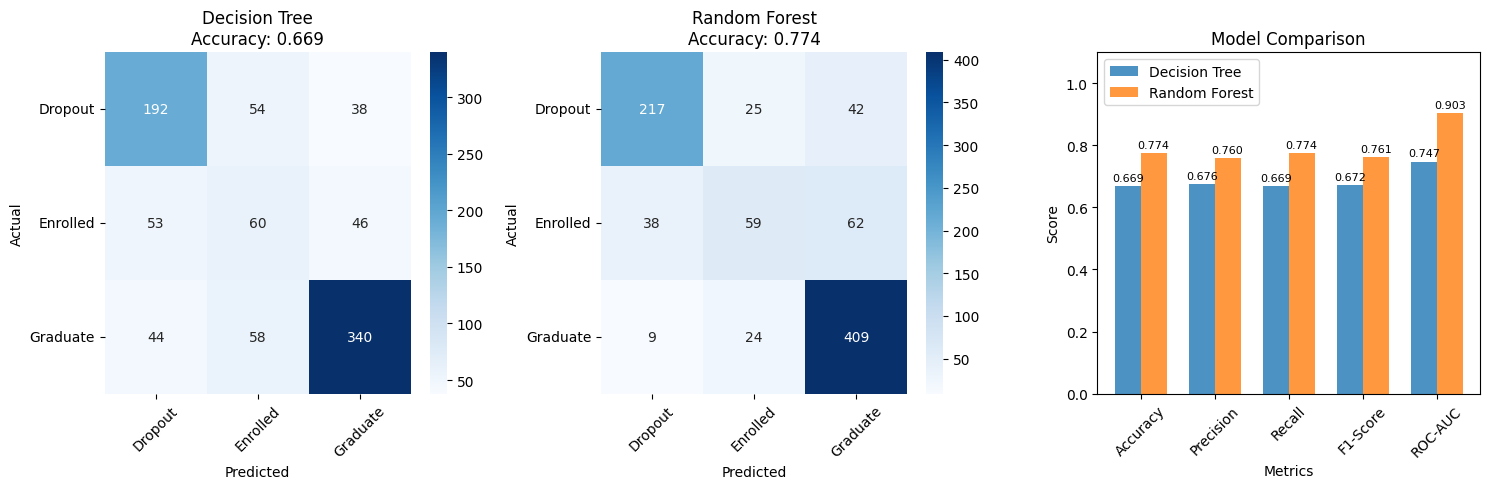


=== ANALISIS PER KELAS ===
Kelas yang ada: ['Dropout' 'Enrolled' 'Graduate']

📊 KELAS: Dropout
Decision Tree - Precision: 0.664, Recall: 0.676, F1: 0.670
Random Forest - Precision: 0.822, Recall: 0.764, F1: 0.792
   ⚠️  DROPOUT ANALYSIS:
      Recall = Kemampuan mendeteksi mahasiswa berisiko dropout
      Precision = Akurasi prediksi dropout (menghindari false alarm)
      → Random Forest lebih baik mendeteksi dropout

📊 KELAS: Enrolled
Decision Tree - Precision: 0.349, Recall: 0.377, F1: 0.363
Random Forest - Precision: 0.546, Recall: 0.371, F1: 0.442

📊 KELAS: Graduate
Decision Tree - Precision: 0.802, Recall: 0.769, F1: 0.785
Random Forest - Precision: 0.797, Recall: 0.925, F1: 0.857


In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix, roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# LANGKAH 1: Cari label mapping dulu
print("=== CEK LABEL MAPPING ===")

# Cek label asli dari dataset
try:
    if 'df_combined' in locals():
        original_labels = df_combined['Status'].unique()
        print(f"Label asli dari df_combined: {original_labels}")
    elif 'df_scaled' in locals():
        original_labels = df_scaled['Status'].unique()
        print(f"Label asli dari df_scaled: {original_labels}")
    elif 'df' in locals():
        original_labels = df['Status'].unique()
        print(f"Label asli dari df: {original_labels}")
    
    # Buat mapping
    unique_encoded = sorted(np.unique(y_test))
    unique_original = sorted(original_labels) if 'original_labels' in locals() else None
    
    if unique_original:
        label_mapping = dict(zip(unique_encoded, unique_original))
    else:
        # Default mapping untuk student dropout
        label_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}
    
    print(f"Mapping label:")
    for encoded, original in label_mapping.items():
        print(f"  {encoded} -> {original}")
        
except Exception as e:
    print(f"Menggunakan mapping default: {e}")
    label_mapping = {0: 'Graduate', 1: 'Dropout', 2: 'Enrolled'}
    print(f"Mapping label:")
    for encoded, original in label_mapping.items():
        print(f"  {encoded} -> {original}")

# LANGKAH 2: Evaluasi model dengan info yang jelas
print("\n=== EVALUASI MODEL ===")

# Cek distribusi kelas di data test
print("\n1. DISTRIBUSI KELAS:")
print("Distribusi y_test:")
dist_counts = pd.Series(y_test).value_counts().sort_index()
print(dist_counts)

print("\nDengan label asli:")
for encoded, count in dist_counts.items():
    original = label_mapping.get(encoded, f'Unknown_{encoded}')
    prop = count / len(y_test)
    print(f"  {original}: {count} ({prop:.1%})")

# LANGKAH 3: Evaluasi Decision Tree
print("\n" + "="*50)
print("DECISION TREE")
print("="*50)

dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred, average='weighted', zero_division=0)
dt_recall = recall_score(y_test, dt_pred, average='weighted', zero_division=0)
dt_f1 = f1_score(y_test, dt_pred, average='weighted', zero_division=0)

print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1-Score: {dt_f1:.4f}")

print("\nClassification Report:")
target_names = [label_mapping.get(i, f'Class_{i}') for i in sorted(np.unique(y_test))]
print(classification_report(y_test, dt_pred, target_names=target_names))

print("\nConfusion Matrix:")
dt_cm = confusion_matrix(y_test, dt_pred)
print(dt_cm)

# LANGKAH 4: Evaluasi Random Forest
print("\n" + "="*50)
print("RANDOM FOREST")
print("="*50)

rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, rf_pred, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, rf_pred, average='weighted', zero_division=0)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, rf_pred, target_names=target_names))

print("\nConfusion Matrix:")
rf_cm = confusion_matrix(y_test, rf_pred)
print(rf_cm)

# LANGKAH 5: ROC-AUC (jika multiclass)
unique_classes = len(np.unique(y_test))
print(f"\nJumlah kelas unik: {unique_classes}")

try:
    # Untuk multiclass, gunakan 'ovr' (one-vs-rest)
    dt_proba = dt_model.predict_proba(X_test)
    rf_proba = rf_model.predict_proba(X_test)
    
    dt_auc = roc_auc_score(y_test, dt_proba, multi_class='ovr', average='weighted')
    rf_auc = roc_auc_score(y_test, rf_proba, multi_class='ovr', average='weighted')
    
    print(f"\nROC-AUC Scores (multiclass):")
    print(f"Decision Tree: {dt_auc:.4f}")
    print(f"Random Forest: {rf_auc:.4f}")
except Exception as e:
    print(f"\nTidak bisa menghitung ROC-AUC: {e}")

# LANGKAH 6: Perbandingan Model
print("\n" + "="*60)
print("PERBANDINGAN MODEL")
print("="*60)

comparison_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'Decision Tree': [dt_accuracy, dt_precision, dt_recall, dt_f1],
    'Random Forest': [rf_accuracy, rf_precision, rf_recall, rf_f1]
}

if 'dt_auc' in locals() and 'rf_auc' in locals():
    comparison_data['Metric'].append('ROC-AUC')
    comparison_data['Decision Tree'].append(dt_auc)
    comparison_data['Random Forest'].append(rf_auc)

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.round(4))

# LANGKAH 7: Model terbaik
print(f"\n=== MODEL TERBAIK ===")
if rf_f1 > dt_f1:
    print(f"Random Forest lebih baik dengan F1-Score: {rf_f1:.4f}")
else:
    print(f"Decision Tree lebih baik dengan F1-Score: {dt_f1:.4f}")

# LANGKAH 8: Visualisasi Confusion Matrix dengan label asli
plt.figure(figsize=(15, 5))

# Confusion Matrix Decision Tree
plt.subplot(1, 3, 1)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Decision Tree\nAccuracy: {dt_accuracy:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Confusion Matrix Random Forest
plt.subplot(1, 3, 2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title(f'Random Forest\nAccuracy: {rf_accuracy:.3f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Perbandingan metrik
plt.subplot(1, 3, 3)
x = np.arange(len(comparison_df))
width = 0.35

plt.bar(x - width/2, comparison_df['Decision Tree'], width, label='Decision Tree', alpha=0.8)
plt.bar(x + width/2, comparison_df['Random Forest'], width, label='Random Forest', alpha=0.8)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Comparison')
plt.xticks(x, comparison_df['Metric'], rotation=45)
plt.legend()
plt.ylim(0, 1.1)

# Add value labels on bars
for i, v in enumerate(comparison_df['Decision Tree']):
    plt.text(i - width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)
for i, v in enumerate(comparison_df['Random Forest']):
    plt.text(i + width/2, v + 0.01, f'{v:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

# LANGKAH 9: Analisis per kelas dengan label asli
print(f"\n=== ANALISIS PER KELAS ===")
class_names = np.unique(y_test)
print(f"Kelas yang ada: {class_names}")

for class_name in class_names:
    original_name = label_mapping.get(class_name, f'Unknown_{class_name}')
    
    dt_class_precision = precision_score(y_test, dt_pred, labels=[class_name], average=None, zero_division=0)[0]
    dt_class_recall = recall_score(y_test, dt_pred, labels=[class_name], average=None, zero_division=0)[0]
    dt_class_f1 = f1_score(y_test, dt_pred, labels=[class_name], average=None, zero_division=0)[0]
    
    rf_class_precision = precision_score(y_test, rf_pred, labels=[class_name], average=None, zero_division=0)[0]
    rf_class_recall = recall_score(y_test, rf_pred, labels=[class_name], average=None, zero_division=0)[0]
    rf_class_f1 = f1_score(y_test, rf_pred, labels=[class_name], average=None, zero_division=0)[0]
    
    print(f"\n📊 KELAS: {original_name}")
    print(f"Decision Tree - Precision: {dt_class_precision:.3f}, Recall: {dt_class_recall:.3f}, F1: {dt_class_f1:.3f}")
    print(f"Random Forest - Precision: {rf_class_precision:.3f}, Recall: {rf_class_recall:.3f}, F1: {rf_class_f1:.3f}")
    
    # Interpretasi khusus untuk Dropout
    if 'dropout' in original_name.lower():
        print(f"   ⚠️  DROPOUT ANALYSIS:")
        print(f"      Recall = Kemampuan mendeteksi mahasiswa berisiko dropout")
        print(f"      Precision = Akurasi prediksi dropout (menghindari false alarm)")
        if rf_class_recall > dt_class_recall:
            print(f"      → Random Forest lebih baik mendeteksi dropout")
        else:
            print(f"      → Decision Tree lebih baik mendeteksi dropout")



In [40]:
# Simpan model Decision Tree dan Random Forest yang sudah dilatih
joblib.dump(dt_model, 'decision_tree_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')
print("Model berhasil disimpan sebagai 'decision_tree_model.pkl' dan 'random_forest_model.pkl'")

Model berhasil disimpan sebagai 'decision_tree_model.pkl' dan 'random_forest_model.pkl'
